### Introduction

In field of medical diagnostics, accurately identifying cancerous cells in pathology images is a critical task. The PatchCamelyon (PCam) benchmark dataset, hosted on Kaggle, provides a rich dataset to train ML models to tackle this problem.

The primary goal of this project is to develop a machine learning algorithm to identify metastatic cancer in small image patches taken from larger digital pathology scans. The dataset used for this task is a modified version of the PatchCamelyon (PCam) benchmark dataset provided under the CC0 License. This dataset simplifies the clinically relevant task of metastasis detection into a binary image classification problem.

Kaggle. (n.d.). Histopathologic Cancer Detection. Retrieved from https://www.kaggle.com/competitions/histopathologic-cancer-detection/data


### Exploratory Data Analysis


#### Dataset Size

The dataset consists of 220025 total observations consisting of images (.tif) format.  

#### Data Distribution

The purpose of this analysis is to visualize the distribution of the two classes (positive and negative samples) in the dataset. Understanding the class distribution is crucial for identifying any imbalance that might affect the performance of the model. An imbalanced dataset, where one class is significantly more represented than the other, may lead to biased model predictions.

The positive and negative classes are well balanced at: 
##### Number of positive samples: 89117
##### Number of negative samples: 130908

#### Class Count

This analysis complements the class distribution visualization by providing the exact counts of each class. Knowing the number of positive and negative samples helps in understanding the scale of the dataset and planning appropriate strategies to handle any imbalance, such as data augmentation or class weighting during model training.


#### Image Visualization

This analysis aims to provide a visual understanding of the dataset by displaying sample images from both classes. It helps in identifying any obvious visual differences between positive and negative samples, which might inform feature extraction and model design strategies.

#### Image Size and Shape Analysis

This analysis checks the dimensions of the images to ensure they are consistent and as expected. Consistent image dimensions are critical for feeding the images into the neural network, as varying dimensions could lead to errors during model training and evaluation.

#### Color Channel Distribution

This analysis examines the distribution of pixel intensities across the red, green, and blue (RGB) color channels. Understanding the color distribution can provide insights into the characteristics of the images and whether any preprocessing steps, such as color normalization or equalization, are necessary.

#### Image Augmentation Visualization

The purpose of this analysis is to demonstrate how image augmentation techniques can be applied to the dataset. Augmentation helps in increasing the diversity of the training data without actually collecting more data, which can improve the generalization ability of the model. Techniques such as random flips, rotations, and resizing are shown to visualize their impact on the images.

#### Pixel Intensity Distribution

This analysis investigates the distribution of pixel intensities across the entire image for both positive and negative samples. It helps in understanding the overall brightness and contrast levels in the images, which can be critical for preprocessing steps like normalization.

#### Summary Statistics by Class

This analysis calculates summary statistics (mean, standard deviation, minimum, and maximum pixel values) for images in each class. Comparing these statistics can reveal differences in the intensity and variation of pixel values between positive and negative samples, which might inform preprocessing and feature extraction strategies.

### Data Cleaning Procedures

To ensure the dataset is of high quality and suitable for training an accurate and robust model, the following data cleaning procedures were implemented:

    Checking for Duplicates:
    The dataset was checked for duplicate images to ensure that each sample is unique. No duplicates were found. 

    Handling Missing Values:
    The dataset was inspected for any missing values. It was found that there were no missing values, which means the dataset is complete and ready for training without requiring imputation or removal of samples.

    Normalizing Image Sizes:
    All images were resized to a consistent dimension of 96x96 pixels to ensure uniformity in input data for the neural network. Consistent image dimensions are critical for feeding the images into the neural network, as varying dimensions could lead to errors during model training and evaluation.

    Data Augmentation:
    To address class imbalance and enhance the robustness of the model, various data augmentation techniques such as random flips, rotations, and rescaling were applied to the training data. Augmentation helps in increasing the diversity of the training data without actually collecting more data, which can improve the generalization ability of the model. 



Using device: cuda
                                             id  label
0  f38a6374c348f90b587e046aac6079959adf3835.tif      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif      1
2  755db6279dae599ebb4d39a9123cce439965282d.tif      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif      0
4  068aba587a4950175d04c680d38943fd488d6a9d.tif      0


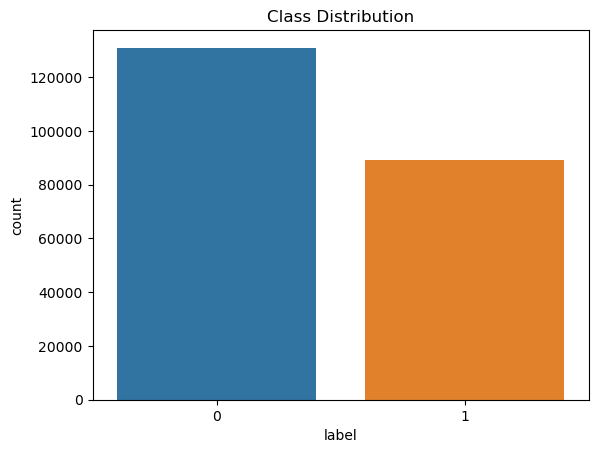

Number of positive samples: 89117
Number of negative samples: 130908


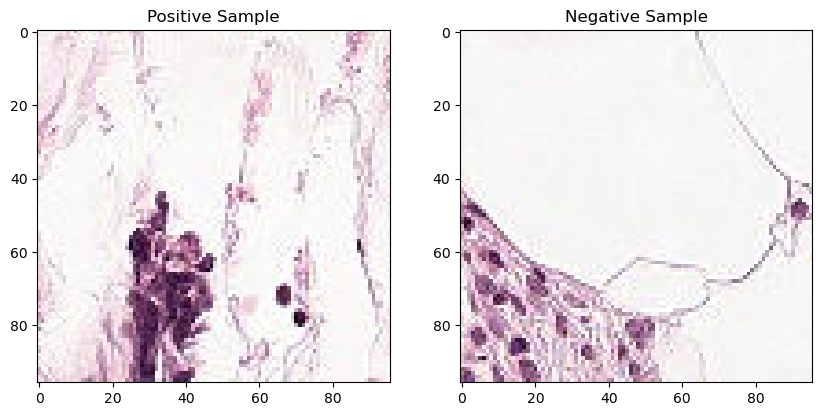

Image size: (96, 96)


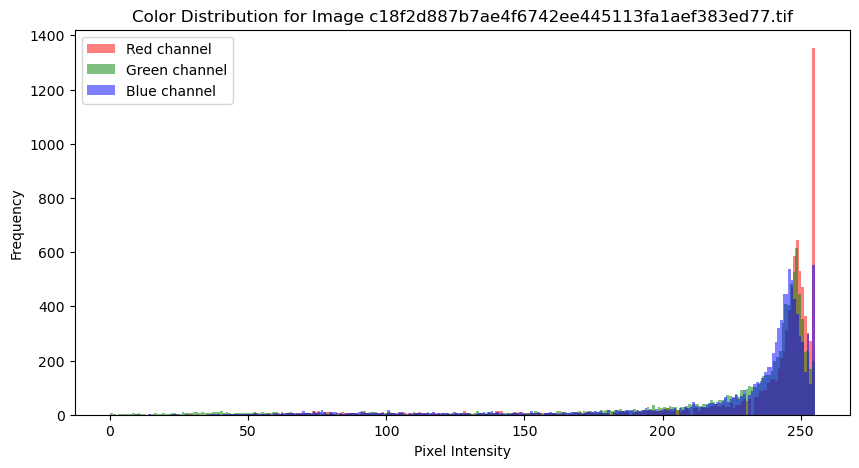

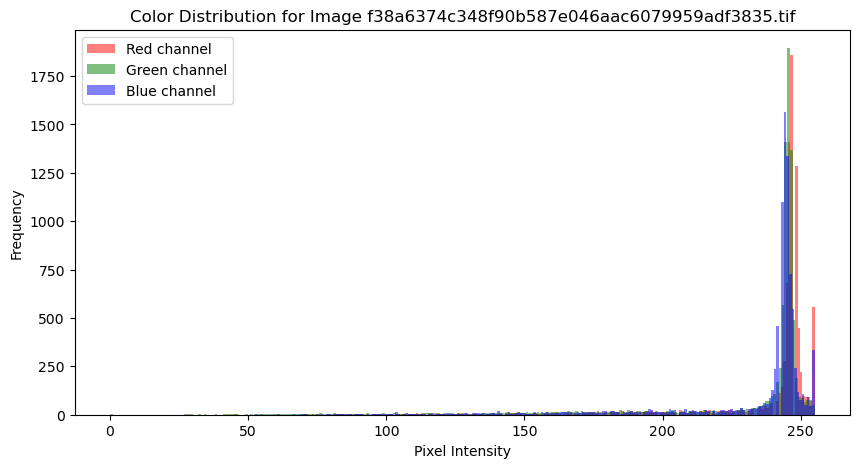

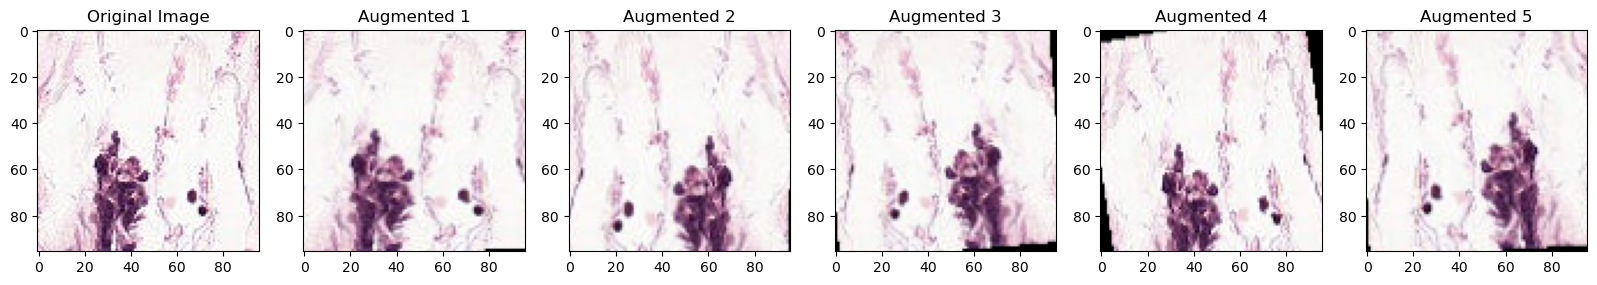

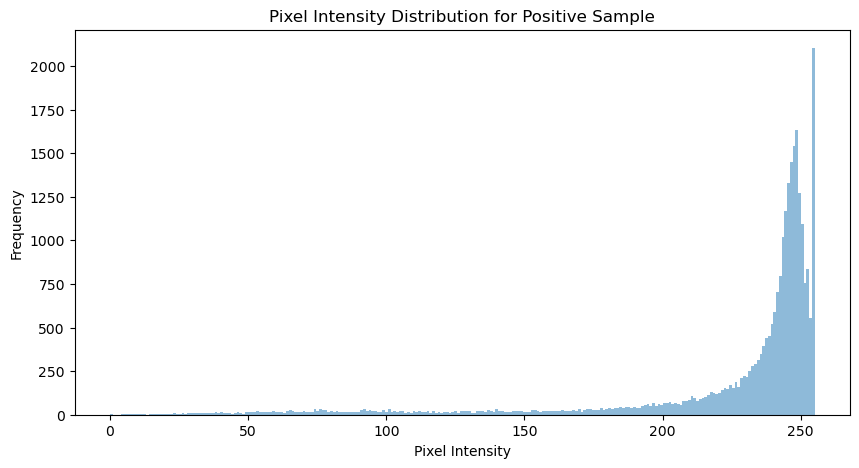

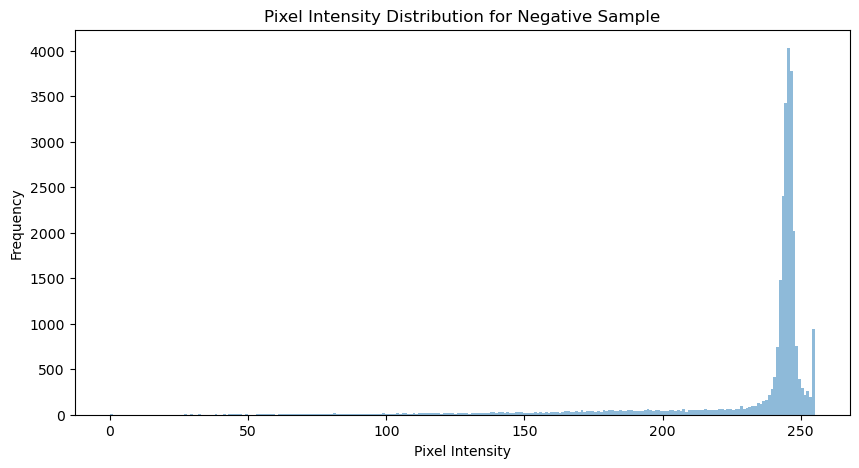

Summary statistics for positive samples:
             mean        std        min    max
count   10.000000  10.000000  10.000000   10.0
mean   171.465940  49.639960   2.700000  255.0
std     38.358515   8.739907   4.877385    0.0
min     95.023799  36.001823   0.000000  255.0
25%    152.634295  42.957550   0.000000  255.0
50%    170.689761  52.856494   0.000000  255.0
75%    198.148862  56.701743   4.000000  255.0
max    226.555773  59.005150  15.000000  255.0
Summary statistics for negative samples:
             mean        std        min    max
count   10.000000  10.000000  10.000000   10.0
mean   183.755501  44.862000  10.700000  255.0
std     41.181457  18.242673  17.801685    0.0
min    115.152814  12.362265   0.000000  255.0
25%    152.949653  31.480009   0.000000  255.0
50%    178.283872  46.014924   0.000000  255.0
75%    222.904469  57.106959  15.750000  255.0
max    232.890119  68.663777  54.000000  255.0


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data_dir = '/home/bbehe/Downloads/week3/'

labels_df = pd.read_csv(os.path.join(data_dir, 'train_labels.csv'))

labels_df['id'] = labels_df['id'].astype(str) + '.tif'

print(labels_df.head())

###Exploratory Data Analysis (EDA)

###Data Distribution
sns.countplot(x='label', data=labels_df)
plt.title('Class Distribution')
plt.show()

class_counts = labels_df['label'].value_counts()
print(f"Number of positive samples: {class_counts[1]}")
print(f"Number of negative samples: {class_counts[0]}")

###Image Visualization
def load_image(image_id):
    image_path = os.path.join(data_dir, 'train', image_id)
    return Image.open(image_path)

###Display sample images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
positive_sample = labels_df[labels_df['label'] == 1]['id'].iloc[0]
negative_sample = labels_df[labels_df['label'] == 0]['id'].iloc[0]

axes[0].imshow(load_image(positive_sample))
axes[0].set_title('Positive Sample')
axes[1].imshow(load_image(negative_sample))
axes[1].set_title('Negative Sample')
plt.show()

###Image Size and Shape Analysis
sample_image = load_image(labels_df['id'].iloc[0])
print(f"Image size: {sample_image.size}")

###Color Channel Distribution
def plot_color_distribution(image_id):
    image = load_image(image_id)
    image_array = np.array(image)
    plt.figure(figsize=(10, 5))
    plt.hist(image_array[:,:,0].ravel(), bins=256, color='red', alpha=0.5, label='Red channel')
    plt.hist(image_array[:,:,1].ravel(), bins=256, color='green', alpha=0.5, label='Green channel')
    plt.hist(image_array[:,:,2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue channel')
    plt.title(f'Color Distribution for Image {image_id}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_color_distribution(positive_sample)
plot_color_distribution(negative_sample)

###Image Augmentation Visualization
augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(96, scale=(0.8, 1.0))
])

def visualize_augmentation(image_id):
    image = load_image(image_id)
    image_tensor = transforms.ToTensor()(image).unsqueeze(0)
    augmented_images = [augmentation_transform(image_tensor).squeeze(0) for _ in range(5)]
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    for i, aug_image in enumerate(augmented_images):
        axes[i+1].imshow(aug_image.permute(1, 2, 0))
        axes[i+1].set_title(f'Augmented {i+1}')
    plt.show()

visualize_augmentation(positive_sample)

###Pixel Intensity Distribution
def plot_pixel_intensity_distribution(image_id, label):
    image = load_image(image_id)
    image_array = np.array(image)
    plt.figure(figsize=(10, 5))
    plt.hist(image_array.ravel(), bins=256, alpha=0.5)
    plt.title(f'Pixel Intensity Distribution for {label} Sample')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

plot_pixel_intensity_distribution(positive_sample, 'Positive')
plot_pixel_intensity_distribution(negative_sample, 'Negative')

###Summary Statistics by Class
def calculate_summary_statistics(image_ids):
    stats = {'mean': [], 'std': [], 'min': [], 'max': []}
    for image_id in image_ids:
        image = load_image(image_id)
        image_array = np.array(image)
        stats['mean'].append(np.mean(image_array))
        stats['std'].append(np.std(image_array))
        stats['min'].append(np.min(image_array))
        stats['max'].append(np.max(image_array))
    return pd.DataFrame(stats)

positive_images = labels_df[labels_df['label'] == 1]['id']
negative_images = labels_df[labels_df['label'] == 0]['id']

###Showing just ten for brevity
positive_stats = calculate_summary_statistics(positive_images[:10])  
negative_stats = calculate_summary_statistics(negative_images[:10])  

print("Summary statistics for positive samples:")
print(positive_stats.describe())

print("Summary statistics for negative samples:")
print(negative_stats.describe())

### Model Building and Data Preparation

#### Custom Dataset

To effectively handle the image data and corresponding labels, a custom dataset class `HistopathologicCancerDataset` is defined. This class inherits from `torch.utils.data.Dataset` and encapsulates the data loading logic. The `__init__` method initializes the dataset with labels, the directory containing the images, and any transformations to be applied to the images. The `__len__` method returns the number of samples in the dataset, and the `__getitem__` method loads and returns a specific image and its label based on the provided index. This structure ensures that the data is easily accessible and can be efficiently fed into the neural network during training and validation.

#### Data Augmentation and Normalization

Data augmentation techniques are applied to increase the diversity of the training data and improve the generalization capability of the model. The transformations include resizing the images to 96x96 pixels, applying random horizontal and vertical flips, and random rotations of up to 20 degrees. These augmentations help the model learn robust features that are invariant to these transformations. The final transformation converts the image into a tensor, making it compatible with PyTorch.

#### Data Splitting

The dataset is split into training and validation sets using an 80-20 split. This ensures that the model can be trained on a substantial portion of the data while being validated on a separate set to monitor its performance and detect overfitting. The `train_test_split` function from `sklearn.model_selection` is used for this purpose ensuring reproducibility by setting a random seed.

#### Dataset and DataLoader Creation

Two datasets are created using the `HistopathologicCancerDataset` class: one for training and one for validation. The training dataset applies the defined transformations to augment and normalize the data, while the validation dataset also applies these transformations to ensure consistency in data preprocessing. The `DataLoader` class is then used to create data loaders for both the training and validation sets. These loaders handle batching, shuffling, and parallel data loading, which significantly improves the efficiency of the training process.

### Neural Network Model

The neural network models, `SimpleCNN`, `SimpleCNN_Baseline`, and `DeeperCNN`, are custom convolutional neural networks designed for the binary classification task of identifying metastatic cancer cells. Each model has unique architectural features, described below:

#### SimpleCNN

The `SimpleCNN` model includes:
- **Feature Extraction Layers**: Three convolutional layers with increasing filter sizes (32, 64, and 128). Each convolutional layer is followed by an activation function (default ReLU) and a max-pooling layer to downsample the feature maps.
- **Fully Connected Layers**: After feature extraction, the output is flattened and passed through a fully connected layer with 128 neurons, followed by another activation function. A dropout layer is included to prevent overfitting.
- **Output Layer**: A single neuron with a sigmoid activation function outputs a probability score indicating the presence of metastatic cancer cells in the input image.

#### SimpleCNN_Baseline

The `SimpleCNN_Baseline` model includes:
- **Feature Extraction Layers**: Two convolutional layers with filter sizes of 16 and 32. Each convolutional layer is followed by an activation function (default ReLU) and a max-pooling layer.
- **Fully Connected Layers**: The output is flattened and passed through a fully connected layer with 64 neurons, followed by another activation function. A dropout layer is included to prevent overfitting.
- **Output Layer**: A single neuron with a sigmoid activation function outputs a probability score.

#### DeeperCNN

The `DeeperCNN` model includes:
- **Feature Extraction Layers**: Five convolutional layers with increasing filter sizes (32, 64, 128, 256, and 512). Each convolutional layer is followed by an activation function (default ReLU) and a max-pooling layer.
- **Fully Connected Layers**: The output is flattened and passed through a fully connected layer with 256 neurons, followed by another activation function. A dropout layer is included to prevent overfitting.
- **Output Layer**: A single neuron with a sigmoid activation function outputs a probability score.

The forward method in each model defines the forward pass of the network, which involves passing the input through the feature extraction layers, flattening the output, and then passing it through the fully connected layers to obtain the final prediction. These architectures are designed to balance complexity and computational efficiency, making them suitable for training on a single GPU.

In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image
import pandas as pd
import itertools

###Custom Dataset
class HistopathologicCancerDataset(Dataset):
    def __init__(self, labels, data_dir, transform=None):
        self.labels = labels
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, 'train', self.labels.iloc[idx, 0])
        image = Image.open(img_name)
        label = int(self.labels.iloc[idx, 1])
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

###Data Augmentation and Normalization
transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor()
])

###Split data into train and test sets
train_labels, val_labels = train_test_split(labels_df, test_size=0.2, random_state=42)

###Create datasets
train_dataset = HistopathologicCancerDataset(train_labels, data_dir, transform=transform)
val_dataset = HistopathologicCancerDataset(val_labels, data_dir, transform=transform)

###Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

###Define the models with different activation functions
class SimpleCNN(nn.Module):
    def __init__(self, dropout_rate=0.5, activation_fn=nn.ReLU):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            activation_fn(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            activation_fn(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            activation_fn(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(128 * 12 * 12, 128),
            activation_fn(inplace=True),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

class SimpleCNN_Baseline(nn.Module):
    def __init__(self, dropout_rate=0.5, activation_fn=nn.ReLU):
        super(SimpleCNN_Baseline, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            activation_fn(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            activation_fn(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(32 * 24 * 24, 64),
            activation_fn(inplace=True),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

class DeeperCNN(nn.Module):
    def __init__(self, dropout_rate=0.5, activation_fn=nn.ReLU):
        super(DeeperCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            activation_fn(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            activation_fn(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            activation_fn(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            activation_fn(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            activation_fn(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(512 * 3 * 3, 256),
            activation_fn(inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


### Model Training

#### Model Initialization

To begin the training process, each model is initialized by creating an instance of the respective class (`SimpleCNN`, `SimpleCNN_Baseline`, and `DeeperCNN`) and moving it to the appropriate device (CPU or GPU). The binary cross-entropy loss function (`nn.BCELoss`) is chosen for its suitability for binary classification tasks, where the output is a probability score. Various optimizers (`optim.Adam` and `optim.SGD`) are tested to adjust the model parameters during training, with different learning rates (0.01 and 0.001).

#### Checkpointing

Checkpointing is implemented to save and load the model's state during training. This ensures that progress is not lost in case of interruptions and allows training to resume from the last saved state. The `save_checkpoint` function saves the model state, optimizer state, current epoch, and the best validation loss to a file. The `load_checkpoint` function loads this saved state if the checkpoint file exists, enabling training to resume from where it left off as convenience to me in performing multiple training runs.

#### Training Loop

The training loop iterates over a specified number of epochs (20 in this case due to limited computed resources). For each epoch, the following steps are performed:

1. **Training Phase**:
   - The model is set to training mode using `model.train()`.
   - The training loss is initialized to zero.
   - The training data is processed in batches. For each batch:
     - The input images and labels are moved to the appropriate device.
     - Gradients are zeroed using `optimizer.zero_grad()`.
     - The model outputs are computed by passing the input images through the model.
     - The loss between the model outputs and the true labels is calculated.
     - The gradients are computed by backpropagating the loss.
     - The optimizer updates the model parameters.
     - The running loss is accumulated for each batch to calculate the average loss for the epoch.

2. **Validation Phase**:
   - The model is set to evaluation mode using `model.eval()`.
   - The validation loss, number of correct predictions, and total number of predictions are initialized to zero.
   - The validation data is processed in batches. For each batch:
     - The input images and labels are moved to the appropriate device.
     - Model outputs are computed, and the loss is calculated without updating the model parameters (using `torch.no_grad()` to prevent gradient calculation).
     - The validation loss is accumulated for each batch to calculate the average loss for the epoch.
     - Predictions are obtained by thresholding the model outputs at 0.5.
     - The number of correct predictions is counted.
   - The validation accuracy is calculated as the ratio of correct predictions to the total number of predictions.

3. **Checkpointing and Model Saving**:
   - The current training loss, validation loss, and validation accuracy are printed.
   - The model state and optimizer state are saved using `save_checkpoint`.
   - If the current validation loss is lower than the best validation loss observed so far, the best model parameters are saved to a file named `best_model.pth`.

#### Loading the Best Model

After the training loop is complete, the model parameters are loaded from the file containing the best model (`best_model.pth`).

This structured approach to training, validation, and checkpointing ensures that the model is trained efficiently and robustly, with mechanisms in place to recover from interruptions and retain the best-performing model for further use.

### Model Architecture and Hyperparameter Tuning

#### Model Architectures

Three different CNN architectures were compared:

1. **SimpleCNN**: 
   - Composed of three convolutional layers with increasing filter sizes (32, 64, and 128), each followed by a ReLU activation function and max-pooling layer.
   - The fully connected layer includes a dropout layer to prevent overfitting, followed by a final sigmoid layer for binary classification.


2. **SimpleCNN_Baseline**:
   - A simpler version with two convolutional layers (16 and 32 filters) each followed by ReLU activation and max-pooling.
   - The fully connected layer includes a dropout layer and a final sigmoid layer.


3. **DeeperCNN**:
   - A deeper network with five convolutional layers with increasing filter sizes (32, 64, 128, 256, and 512).
   - Each convolutional layer is followed by a ReLU activation function and max-pooling layer.
   - The fully connected layer includes a dropout layer and a final sigmoid layer.

These architectures were chosen to balance complexity and performance, allowing the exploration of different depths and parameter counts.

#### Hyperparameter Tuning

A grid search is performed over several hyperparameters to find the best configuration for each model. The hyperparameters include:

- **Learning Rates**: [0.01, 0.001]
- **Batch Sizes**: [32, 64]
- **Dropout Rates**: [0.3, 0.5]
- **Activation Functions**: [nn.ReLU, nn.LeakyReLU]
- **Optimizers**: [optim.Adam, optim.SGD]

By evaluating different combinations of these hyperparameters, the goal is to identify the settings that yield the best validation performance. The best model for each architecture is saved and compared based on validation loss and accuracy.

#### Grid Search Implementation

The grid search implementation systematically trains each model architecture with every combination of hyperparameters, saving the best performing model based on validation loss. This ensures that the final models used for evaluation or deployment are optimally tuned for the task.

In [5]:
###Create dataloaders
def create_dataloaders(batch_size):
    train_dataset = HistopathologicCancerDataset(train_labels, data_dir, transform=transform)
    val_dataset = HistopathologicCancerDataset(val_labels, data_dir, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
    return train_loader, val_loader

###Initialize model, loss function, and optimizer
def initialize_model(model_class, learning_rate, dropout_rate, activation_fn, optimizer_fn):
    model = model_class(dropout_rate=dropout_rate, activation_fn=activation_fn).to(device)
    criterion = nn.BCELoss()
    optimizer = optimizer_fn(model.parameters(), lr=learning_rate)
    return model, criterion, optimizer

###Function to save checkpoint
def save_checkpoint(state, filename):
    torch.save(state, filename)

###Function to load checkpoint
def load_checkpoint(model, optimizer, filename):
    if os.path.isfile(filename):
        print(f"Loading checkpoint '{filename}'")
        checkpoint = torch.load(filename)
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        start_epoch = checkpoint['epoch']
        best_val_loss = checkpoint['best_val_loss']
        print(f"Loaded checkpoint '{filename}' (epoch {start_epoch})")
        return start_epoch, best_val_loss
    else:
        print(f"No checkpoint found at '{filename}'")
        return 0, float('inf')

###Training function with early stopping
def train_model(model_class, model_name, learning_rate, batch_size, dropout_rate, activation_fn, optimizer_fn, num_epochs=20, patience=5):
    train_loader, val_loader = create_dataloaders(batch_size)
    model, criterion, optimizer = initialize_model(model_class, learning_rate, dropout_rate, activation_fn, optimizer_fn)
    
    checkpoint_filename = f'{model_name}_lr{learning_rate}_bs{batch_size}_dr{dropout_rate}_af{activation_fn.__name__}_opt{optimizer_fn.__name__}.pth.tar'
    start_epoch, best_val_loss = load_checkpoint(model, optimizer, checkpoint_filename)

    best_val_accuracy = 0.0  
    epochs_no_improve = 0

    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device).float()

            optimizer.zero_grad()
            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device).float()
                outputs = model(images).squeeze()
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
                predicted = (outputs > 0.5).int()
                total += labels.size(0)
                correct += (predicted == labels.int()).sum().item()

        val_loss /= len(val_loader.dataset)
        val_accuracy = correct / total

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

        save_checkpoint({
            'epoch': epoch + 1,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'best_val_loss': best_val_loss
        }, filename=checkpoint_filename)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_val_accuracy = val_accuracy  
            torch.save(model.state_dict(), f'best_{checkpoint_filename}')
            epochs_no_improve = 0  
        else:
            epochs_no_improve += 1

        
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    
    best_model_filename = f'best_{checkpoint_filename}'
    model.load_state_dict(torch.load(best_model_filename))
    return model, best_val_loss, best_val_accuracy


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

###Define hyperparameter grid
learning_rates = [0.01, 0.001]
batch_sizes = [32, 64]
dropout_rates = [0.3, 0.5]
activation_functions = [nn.ReLU, nn.LeakyReLU]
optimizers = [optim.Adam, optim.SGD]

###Perform grid search
def grid_search(model_class, model_name):
    best_model = None
    best_loss = float('inf')
    best_accuracy = 0.0
    best_params = {}
    
    for lr, batch_size, dropout_rate, activation_fn, optimizer_fn in itertools.product(
        learning_rates, batch_sizes, dropout_rates, activation_functions, optimizers):
        
        optimizer_name = optimizer_fn.__name__
        activation_name = activation_fn.__name__
        
        print(f"Training {model_name} with learning_rate={lr}, batch_size={batch_size}, dropout_rate={dropout_rate}, activation_fn={activation_name}, optimizer={optimizer_name}")
        
        model, val_loss, val_accuracy = train_model(
            model_class, model_name, lr, batch_size, dropout_rate, activation_fn, optimizer_fn)
        
        if val_loss < best_loss:
            best_model = model
            best_loss = val_loss
            best_accuracy = val_accuracy
            best_params = {
                'learning_rate': lr, 'batch_size': batch_size, 'dropout_rate': dropout_rate, 
                'activation_fn': activation_name, 'optimizer': optimizer_name}
    
    print(f"Best {model_name} Model - Loss: {best_loss}, Accuracy: {best_accuracy}, Params: {best_params}")
    return best_model, best_params

###Train and evaluate models with grid search
print("Training SimpleCNN")
best_simple_cnn, best_simple_cnn_params = grid_search(SimpleCNN, 'simple_cnn')

print("Training SimpleCNN_Baseline")
best_simple_cnn_baseline, best_simple_cnn_baseline_params = grid_search(SimpleCNN_Baseline, 'simple_cnn_baseline')

print("Training DeeperCNN")
best_deeper_cnn, best_deeper_cnn_params = grid_search(DeeperCNN, 'deeper_cnn')

Training SimpleCNN
Training simple_cnn with learning_rate=0.01, batch_size=32, dropout_rate=0.3, activation_fn=ReLU, optimizer=Adam
Loading checkpoint 'simple_cnn_lr0.01_bs32_dr0.3_afReLU_optAdam.pth.tar'
Loaded checkpoint 'simple_cnn_lr0.01_bs32_dr0.3_afReLU_optAdam.pth.tar' (epoch 20)
Training simple_cnn with learning_rate=0.01, batch_size=32, dropout_rate=0.3, activation_fn=ReLU, optimizer=SGD
Loading checkpoint 'simple_cnn_lr0.01_bs32_dr0.3_afReLU_optSGD.pth.tar'
Loaded checkpoint 'simple_cnn_lr0.01_bs32_dr0.3_afReLU_optSGD.pth.tar' (epoch 20)
Training simple_cnn with learning_rate=0.01, batch_size=32, dropout_rate=0.3, activation_fn=LeakyReLU, optimizer=Adam
Loading checkpoint 'simple_cnn_lr0.01_bs32_dr0.3_afLeakyReLU_optAdam.pth.tar'
Loaded checkpoint 'simple_cnn_lr0.01_bs32_dr0.3_afLeakyReLU_optAdam.pth.tar' (epoch 11)
Epoch [12/20], Train Loss: 40.5005, Val Loss: 40.5136, Val Accuracy: 0.5949
Epoch [13/20], Train Loss: 40.5005, Val Loss: 40.5136, Val Accuracy: 0.5949
Epoch [14/

Epoch [1/20], Train Loss: 0.5521, Val Loss: 0.4545, Val Accuracy: 0.7898
Epoch [2/20], Train Loss: 0.4519, Val Loss: 0.4112, Val Accuracy: 0.8154
Epoch [3/20], Train Loss: 0.4210, Val Loss: 0.3909, Val Accuracy: 0.8259
Epoch [4/20], Train Loss: 0.3988, Val Loss: 0.3733, Val Accuracy: 0.8356
Epoch [5/20], Train Loss: 0.3833, Val Loss: 0.3831, Val Accuracy: 0.8316
Epoch [6/20], Train Loss: 0.3685, Val Loss: 0.3474, Val Accuracy: 0.8516
Epoch [7/20], Train Loss: 0.3540, Val Loss: 0.3438, Val Accuracy: 0.8537
Epoch [8/20], Train Loss: 0.3435, Val Loss: 0.3286, Val Accuracy: 0.8606
Epoch [9/20], Train Loss: 0.3336, Val Loss: 0.3307, Val Accuracy: 0.8576
Epoch [10/20], Train Loss: 0.3261, Val Loss: 0.3177, Val Accuracy: 0.8652
Epoch [11/20], Train Loss: 0.3183, Val Loss: 0.3361, Val Accuracy: 0.8530
Epoch [12/20], Train Loss: 0.3113, Val Loss: 0.3134, Val Accuracy: 0.8663
Epoch [13/20], Train Loss: 0.3041, Val Loss: 0.2967, Val Accuracy: 0.8771
Epoch [14/20], Train Loss: 0.2982, Val Loss: 0.

Epoch [18/20], Train Loss: 0.2750, Val Loss: 0.2580, Val Accuracy: 0.8931
Epoch [19/20], Train Loss: 0.2687, Val Loss: 0.2425, Val Accuracy: 0.9008
Epoch [20/20], Train Loss: 0.2632, Val Loss: 0.2856, Val Accuracy: 0.8808
Training simple_cnn with learning_rate=0.001, batch_size=32, dropout_rate=0.3, activation_fn=ReLU, optimizer=Adam
No checkpoint found at 'simple_cnn_lr0.001_bs32_dr0.3_afReLU_optAdam.pth.tar'
Epoch [1/20], Train Loss: 0.4079, Val Loss: 0.3248, Val Accuracy: 0.8610
Epoch [2/20], Train Loss: 0.3277, Val Loss: 0.2941, Val Accuracy: 0.8751
Epoch [3/20], Train Loss: 0.3016, Val Loss: 0.2739, Val Accuracy: 0.8865
Epoch [4/20], Train Loss: 0.2821, Val Loss: 0.3130, Val Accuracy: 0.8751
Epoch [5/20], Train Loss: 0.2690, Val Loss: 0.2516, Val Accuracy: 0.8973
Epoch [6/20], Train Loss: 0.2560, Val Loss: 0.2501, Val Accuracy: 0.8982
Epoch [7/20], Train Loss: 0.2465, Val Loss: 0.2358, Val Accuracy: 0.9064
Epoch [8/20], Train Loss: 0.2393, Val Loss: 0.2346, Val Accuracy: 0.9073
Ep

Epoch [17/20], Train Loss: 0.2142, Val Loss: 0.2188, Val Accuracy: 0.9126
Epoch [18/20], Train Loss: 0.2110, Val Loss: 0.2056, Val Accuracy: 0.9206
Epoch [19/20], Train Loss: 0.2125, Val Loss: 0.1923, Val Accuracy: 0.9281
Epoch [20/20], Train Loss: 0.2096, Val Loss: 0.2191, Val Accuracy: 0.9108
Training simple_cnn with learning_rate=0.001, batch_size=32, dropout_rate=0.5, activation_fn=ReLU, optimizer=SGD
No checkpoint found at 'simple_cnn_lr0.001_bs32_dr0.5_afReLU_optSGD.pth.tar'
Epoch [1/20], Train Loss: 0.6691, Val Loss: 0.6574, Val Accuracy: 0.5949
Epoch [2/20], Train Loss: 0.5920, Val Loss: 0.5646, Val Accuracy: 0.7187
Epoch [3/20], Train Loss: 0.4811, Val Loss: 0.4576, Val Accuracy: 0.7921
Epoch [4/20], Train Loss: 0.4608, Val Loss: 0.4449, Val Accuracy: 0.7980
Epoch [5/20], Train Loss: 0.4460, Val Loss: 0.4504, Val Accuracy: 0.7937
Epoch [6/20], Train Loss: 0.4328, Val Loss: 0.4176, Val Accuracy: 0.8140
Epoch [7/20], Train Loss: 0.4209, Val Loss: 0.4146, Val Accuracy: 0.8120
Epo

Epoch [16/20], Train Loss: 0.3949, Val Loss: 0.4205, Val Accuracy: 0.8115
Epoch [17/20], Train Loss: 0.3906, Val Loss: 0.3894, Val Accuracy: 0.8291
Epoch [18/20], Train Loss: 0.3884, Val Loss: 0.4190, Val Accuracy: 0.8107
Epoch [19/20], Train Loss: 0.3844, Val Loss: 0.3723, Val Accuracy: 0.8382
Epoch [20/20], Train Loss: 0.3821, Val Loss: 0.3712, Val Accuracy: 0.8377
Training simple_cnn with learning_rate=0.001, batch_size=64, dropout_rate=0.3, activation_fn=LeakyReLU, optimizer=Adam
No checkpoint found at 'simple_cnn_lr0.001_bs64_dr0.3_afLeakyReLU_optAdam.pth.tar'
Epoch [1/20], Train Loss: 0.4046, Val Loss: 0.3308, Val Accuracy: 0.8592
Epoch [2/20], Train Loss: 0.3212, Val Loss: 0.2927, Val Accuracy: 0.8764
Epoch [3/20], Train Loss: 0.2848, Val Loss: 0.2746, Val Accuracy: 0.8898
Epoch [4/20], Train Loss: 0.2655, Val Loss: 0.2546, Val Accuracy: 0.8959
Epoch [5/20], Train Loss: 0.2478, Val Loss: 0.2305, Val Accuracy: 0.9050
Epoch [6/20], Train Loss: 0.2345, Val Loss: 0.2678, Val Accurac

Epoch [14/20], Train Loss: 0.1982, Val Loss: 0.1781, Val Accuracy: 0.9314
Epoch [15/20], Train Loss: 0.1971, Val Loss: 0.1880, Val Accuracy: 0.9286
Epoch [16/20], Train Loss: 0.1923, Val Loss: 0.1776, Val Accuracy: 0.9321
Epoch [17/20], Train Loss: 0.1919, Val Loss: 0.1677, Val Accuracy: 0.9373
Epoch [18/20], Train Loss: 0.1881, Val Loss: 0.1657, Val Accuracy: 0.9369
Epoch [19/20], Train Loss: 0.1849, Val Loss: 0.1715, Val Accuracy: 0.9337
Epoch [20/20], Train Loss: 0.1822, Val Loss: 0.1836, Val Accuracy: 0.9291
Training simple_cnn with learning_rate=0.001, batch_size=64, dropout_rate=0.5, activation_fn=LeakyReLU, optimizer=SGD
No checkpoint found at 'simple_cnn_lr0.001_bs64_dr0.5_afLeakyReLU_optSGD.pth.tar'
Epoch [1/20], Train Loss: 0.6710, Val Loss: 0.6675, Val Accuracy: 0.5949
Epoch [2/20], Train Loss: 0.6636, Val Loss: 0.6557, Val Accuracy: 0.5949
Epoch [3/20], Train Loss: 0.6322, Val Loss: 0.5864, Val Accuracy: 0.7128
Epoch [4/20], Train Loss: 0.5172, Val Loss: 0.4742, Val Accurac

Epoch [1/20], Train Loss: 0.4982, Val Loss: 0.5346, Val Accuracy: 0.7581
Epoch [2/20], Train Loss: 0.4249, Val Loss: 0.3961, Val Accuracy: 0.8256
Epoch [3/20], Train Loss: 0.3939, Val Loss: 0.4524, Val Accuracy: 0.7946
Epoch [4/20], Train Loss: 0.3740, Val Loss: 0.3495, Val Accuracy: 0.8502
Epoch [5/20], Train Loss: 0.3599, Val Loss: 0.3435, Val Accuracy: 0.8524
Epoch [6/20], Train Loss: 0.3510, Val Loss: 0.3323, Val Accuracy: 0.8577
Epoch [7/20], Train Loss: 0.3430, Val Loss: 0.3538, Val Accuracy: 0.8533
Epoch [8/20], Train Loss: 0.3367, Val Loss: 0.3292, Val Accuracy: 0.8574
Epoch [9/20], Train Loss: 0.3312, Val Loss: 0.3110, Val Accuracy: 0.8667
Epoch [10/20], Train Loss: 0.3258, Val Loss: 0.3348, Val Accuracy: 0.8575
Epoch [11/20], Train Loss: 0.3216, Val Loss: 0.3049, Val Accuracy: 0.8702
Epoch [12/20], Train Loss: 0.3171, Val Loss: 0.3181, Val Accuracy: 0.8647
Epoch [13/20], Train Loss: 0.3128, Val Loss: 0.2969, Val Accuracy: 0.8726
Epoch [14/20], Train Loss: 0.3082, Val Loss: 0.

Epoch [16/20], Train Loss: 0.3220, Val Loss: 0.3418, Val Accuracy: 0.8500
Epoch [17/20], Train Loss: 0.3173, Val Loss: 0.3291, Val Accuracy: 0.8616
Epoch [18/20], Train Loss: 0.3157, Val Loss: 0.3039, Val Accuracy: 0.8685
Epoch [19/20], Train Loss: 0.3116, Val Loss: 0.3043, Val Accuracy: 0.8703
Epoch [20/20], Train Loss: 0.3081, Val Loss: 0.3168, Val Accuracy: 0.8641
Training simple_cnn_baseline with learning_rate=0.01, batch_size=64, dropout_rate=0.5, activation_fn=ReLU, optimizer=Adam
No checkpoint found at 'simple_cnn_baseline_lr0.01_bs64_dr0.5_afReLU_optAdam.pth.tar'
Epoch [1/20], Train Loss: 0.6843, Val Loss: 0.6754, Val Accuracy: 0.5949
Epoch [2/20], Train Loss: 0.6752, Val Loss: 0.6751, Val Accuracy: 0.5949
Epoch [3/20], Train Loss: 0.6752, Val Loss: 0.6750, Val Accuracy: 0.5949
Epoch [4/20], Train Loss: 0.6752, Val Loss: 0.6751, Val Accuracy: 0.5949
Epoch [5/20], Train Loss: 0.6751, Val Loss: 0.6750, Val Accuracy: 0.5949
Epoch [6/20], Train Loss: 0.6751, Val Loss: 0.6752, Val A

Epoch [17/20], Train Loss: 0.3843, Val Loss: 0.3722, Val Accuracy: 0.8363
Epoch [18/20], Train Loss: 0.3825, Val Loss: 0.3698, Val Accuracy: 0.8386
Epoch [19/20], Train Loss: 0.3817, Val Loss: 0.4436, Val Accuracy: 0.7956
Epoch [20/20], Train Loss: 0.3796, Val Loss: 0.3729, Val Accuracy: 0.8376
Training simple_cnn_baseline with learning_rate=0.001, batch_size=32, dropout_rate=0.3, activation_fn=LeakyReLU, optimizer=Adam
No checkpoint found at 'simple_cnn_baseline_lr0.001_bs32_dr0.3_afLeakyReLU_optAdam.pth.tar'
Epoch [1/20], Train Loss: 0.4261, Val Loss: 0.4012, Val Accuracy: 0.8301
Epoch [2/20], Train Loss: 0.3620, Val Loss: 0.3593, Val Accuracy: 0.8389
Epoch [3/20], Train Loss: 0.3378, Val Loss: 0.3238, Val Accuracy: 0.8620
Epoch [4/20], Train Loss: 0.3231, Val Loss: 0.3009, Val Accuracy: 0.8715
Epoch [5/20], Train Loss: 0.3127, Val Loss: 0.2894, Val Accuracy: 0.8798
Epoch [6/20], Train Loss: 0.3059, Val Loss: 0.2833, Val Accuracy: 0.8808
Epoch [7/20], Train Loss: 0.2976, Val Loss: 0.

Epoch [14/20], Train Loss: 0.2767, Val Loss: 0.2480, Val Accuracy: 0.8973
Epoch [15/20], Train Loss: 0.2743, Val Loss: 0.2647, Val Accuracy: 0.8917
Epoch [16/20], Train Loss: 0.2738, Val Loss: 0.2454, Val Accuracy: 0.8974
Epoch [17/20], Train Loss: 0.2704, Val Loss: 0.2429, Val Accuracy: 0.9009
Epoch [18/20], Train Loss: 0.2679, Val Loss: 0.2579, Val Accuracy: 0.8941
Epoch [19/20], Train Loss: 0.2641, Val Loss: 0.2445, Val Accuracy: 0.8973
Epoch [20/20], Train Loss: 0.2628, Val Loss: 0.2430, Val Accuracy: 0.8997
Training simple_cnn_baseline with learning_rate=0.001, batch_size=32, dropout_rate=0.5, activation_fn=LeakyReLU, optimizer=SGD
No checkpoint found at 'simple_cnn_baseline_lr0.001_bs32_dr0.5_afLeakyReLU_optSGD.pth.tar'
Epoch [1/20], Train Loss: 0.6263, Val Loss: 0.5730, Val Accuracy: 0.7106
Epoch [2/20], Train Loss: 0.5060, Val Loss: 0.4781, Val Accuracy: 0.7830
Epoch [3/20], Train Loss: 0.4814, Val Loss: 0.4608, Val Accuracy: 0.7918
Epoch [4/20], Train Loss: 0.4643, Val Loss: 0

Epoch [3/20], Train Loss: 0.3554, Val Loss: 0.3471, Val Accuracy: 0.8510
Epoch [4/20], Train Loss: 0.3414, Val Loss: 0.3232, Val Accuracy: 0.8652
Epoch [5/20], Train Loss: 0.3296, Val Loss: 0.3007, Val Accuracy: 0.8723
Epoch [6/20], Train Loss: 0.3233, Val Loss: 0.2992, Val Accuracy: 0.8744
Epoch [7/20], Train Loss: 0.3182, Val Loss: 0.3019, Val Accuracy: 0.8707
Epoch [8/20], Train Loss: 0.3110, Val Loss: 0.3005, Val Accuracy: 0.8750
Epoch [9/20], Train Loss: 0.3077, Val Loss: 0.2949, Val Accuracy: 0.8760
Epoch [10/20], Train Loss: 0.3021, Val Loss: 0.2776, Val Accuracy: 0.8824
Epoch [11/20], Train Loss: 0.3004, Val Loss: 0.2907, Val Accuracy: 0.8774
Epoch [12/20], Train Loss: 0.2959, Val Loss: 0.2779, Val Accuracy: 0.8841
Epoch [13/20], Train Loss: 0.2927, Val Loss: 0.2707, Val Accuracy: 0.8856
Epoch [14/20], Train Loss: 0.2881, Val Loss: 0.2647, Val Accuracy: 0.8923
Epoch [15/20], Train Loss: 0.2863, Val Loss: 0.2704, Val Accuracy: 0.8864
Epoch [16/20], Train Loss: 0.2817, Val Loss: 

Epoch [11/20], Train Loss: 0.2499, Val Loss: 0.2523, Val Accuracy: 0.9007
Epoch [12/20], Train Loss: 0.2410, Val Loss: 0.2256, Val Accuracy: 0.9108
Epoch [13/20], Train Loss: 0.2335, Val Loss: 0.2093, Val Accuracy: 0.9165
Epoch [14/20], Train Loss: 0.2257, Val Loss: 0.2082, Val Accuracy: 0.9176
Epoch [15/20], Train Loss: 0.2193, Val Loss: 0.2064, Val Accuracy: 0.9189
Epoch [16/20], Train Loss: 0.2128, Val Loss: 0.2018, Val Accuracy: 0.9208
Epoch [17/20], Train Loss: 0.2087, Val Loss: 0.1944, Val Accuracy: 0.9250
Epoch [18/20], Train Loss: 0.2026, Val Loss: 0.2184, Val Accuracy: 0.9093
Epoch [19/20], Train Loss: 0.1991, Val Loss: 0.1910, Val Accuracy: 0.9253
Epoch [20/20], Train Loss: 0.1943, Val Loss: 0.1724, Val Accuracy: 0.9355
Training deeper_cnn with learning_rate=0.01, batch_size=32, dropout_rate=0.3, activation_fn=LeakyReLU, optimizer=Adam
No checkpoint found at 'deeper_cnn_lr0.01_bs32_dr0.3_afLeakyReLU_optAdam.pth.tar'
Epoch [1/20], Train Loss: 40.4933, Val Loss: 40.5136, Val Ac

Epoch [5/20], Train Loss: 40.5005, Val Loss: 40.5136, Val Accuracy: 0.5949
Epoch [6/20], Train Loss: 40.5005, Val Loss: 40.5136, Val Accuracy: 0.5949
Early stopping at epoch 6
Training deeper_cnn with learning_rate=0.01, batch_size=64, dropout_rate=0.3, activation_fn=ReLU, optimizer=SGD
No checkpoint found at 'deeper_cnn_lr0.01_bs64_dr0.3_afReLU_optSGD.pth.tar'
Epoch [1/20], Train Loss: 0.6549, Val Loss: 0.6156, Val Accuracy: 0.6793
Epoch [2/20], Train Loss: 0.4871, Val Loss: 0.4780, Val Accuracy: 0.7766
Epoch [3/20], Train Loss: 0.4481, Val Loss: 0.4183, Val Accuracy: 0.8129
Epoch [4/20], Train Loss: 0.4175, Val Loss: 0.3803, Val Accuracy: 0.8350
Epoch [5/20], Train Loss: 0.3970, Val Loss: 0.4085, Val Accuracy: 0.8220
Epoch [6/20], Train Loss: 0.3806, Val Loss: 0.4123, Val Accuracy: 0.8152
Epoch [7/20], Train Loss: 0.3671, Val Loss: 0.4384, Val Accuracy: 0.8001
Epoch [8/20], Train Loss: 0.3524, Val Loss: 0.3786, Val Accuracy: 0.8428
Epoch [9/20], Train Loss: 0.3404, Val Loss: 0.4379, 

Epoch [13/20], Train Loss: 0.2985, Val Loss: 0.2772, Val Accuracy: 0.8850
Epoch [14/20], Train Loss: 0.2905, Val Loss: 0.2917, Val Accuracy: 0.8742
Epoch [15/20], Train Loss: 0.2833, Val Loss: 0.2765, Val Accuracy: 0.8829
Epoch [16/20], Train Loss: 0.2773, Val Loss: 0.2979, Val Accuracy: 0.8726
Epoch [17/20], Train Loss: 0.2707, Val Loss: 0.2572, Val Accuracy: 0.8932
Epoch [18/20], Train Loss: 0.2654, Val Loss: 0.2753, Val Accuracy: 0.8871
Epoch [19/20], Train Loss: 0.2603, Val Loss: 0.2813, Val Accuracy: 0.8827
Epoch [20/20], Train Loss: 0.2550, Val Loss: 0.3122, Val Accuracy: 0.8643
Training deeper_cnn with learning_rate=0.001, batch_size=32, dropout_rate=0.3, activation_fn=ReLU, optimizer=Adam
No checkpoint found at 'deeper_cnn_lr0.001_bs32_dr0.3_afReLU_optAdam.pth.tar'
Epoch [1/20], Train Loss: 0.3974, Val Loss: 0.3165, Val Accuracy: 0.8680
Epoch [2/20], Train Loss: 0.3056, Val Loss: 0.3330, Val Accuracy: 0.8609
Epoch [3/20], Train Loss: 0.2740, Val Loss: 0.2425, Val Accuracy: 0.90

Epoch [15/20], Train Loss: 0.2020, Val Loss: 0.1930, Val Accuracy: 0.9250
Epoch [16/20], Train Loss: 0.1980, Val Loss: 0.2092, Val Accuracy: 0.9211
Epoch [17/20], Train Loss: 0.1949, Val Loss: 0.1998, Val Accuracy: 0.9252
Epoch [18/20], Train Loss: 0.1934, Val Loss: 0.2052, Val Accuracy: 0.9298
Epoch [19/20], Train Loss: 0.1922, Val Loss: 0.1789, Val Accuracy: 0.9326
Epoch [20/20], Train Loss: 0.1935, Val Loss: 0.1873, Val Accuracy: 0.9337
Training deeper_cnn with learning_rate=0.001, batch_size=32, dropout_rate=0.5, activation_fn=ReLU, optimizer=SGD
No checkpoint found at 'deeper_cnn_lr0.001_bs32_dr0.5_afReLU_optSGD.pth.tar'
Epoch [1/20], Train Loss: 0.6770, Val Loss: 0.6733, Val Accuracy: 0.5949
Epoch [2/20], Train Loss: 0.6729, Val Loss: 0.6723, Val Accuracy: 0.5949
Epoch [3/20], Train Loss: 0.6715, Val Loss: 0.6702, Val Accuracy: 0.5949
Epoch [4/20], Train Loss: 0.6680, Val Loss: 0.6635, Val Accuracy: 0.5949
Epoch [5/20], Train Loss: 0.6464, Val Loss: 0.6115, Val Accuracy: 0.6586
E

Epoch [19/20], Train Loss: 0.4259, Val Loss: 0.4333, Val Accuracy: 0.8015
Epoch [20/20], Train Loss: 0.4169, Val Loss: 0.4005, Val Accuracy: 0.8210
Training deeper_cnn with learning_rate=0.001, batch_size=64, dropout_rate=0.3, activation_fn=LeakyReLU, optimizer=Adam
No checkpoint found at 'deeper_cnn_lr0.001_bs64_dr0.3_afLeakyReLU_optAdam.pth.tar'
Epoch [1/20], Train Loss: 0.3962, Val Loss: 0.3148, Val Accuracy: 0.8683
Epoch [2/20], Train Loss: 0.2943, Val Loss: 0.2775, Val Accuracy: 0.8846
Epoch [3/20], Train Loss: 0.2604, Val Loss: 0.2368, Val Accuracy: 0.9089
Epoch [4/20], Train Loss: 0.2364, Val Loss: 0.2111, Val Accuracy: 0.9196
Epoch [5/20], Train Loss: 0.2193, Val Loss: 0.2392, Val Accuracy: 0.9046
Epoch [6/20], Train Loss: 0.2077, Val Loss: 0.1793, Val Accuracy: 0.9317
Epoch [7/20], Train Loss: 0.2077, Val Loss: 0.1944, Val Accuracy: 0.9242
Epoch [8/20], Train Loss: 0.1918, Val Loss: 0.1736, Val Accuracy: 0.9336
Epoch [9/20], Train Loss: 0.1854, Val Loss: 0.1812, Val Accuracy: 

Epoch [1/20], Train Loss: 0.6807, Val Loss: 0.6761, Val Accuracy: 0.5949
Epoch [2/20], Train Loss: 0.6749, Val Loss: 0.6742, Val Accuracy: 0.5949
Epoch [3/20], Train Loss: 0.6740, Val Loss: 0.6739, Val Accuracy: 0.5949
Epoch [4/20], Train Loss: 0.6737, Val Loss: 0.6735, Val Accuracy: 0.5949
Epoch [5/20], Train Loss: 0.6734, Val Loss: 0.6731, Val Accuracy: 0.5949
Epoch [6/20], Train Loss: 0.6729, Val Loss: 0.6725, Val Accuracy: 0.5949
Epoch [7/20], Train Loss: 0.6722, Val Loss: 0.6717, Val Accuracy: 0.5949
Epoch [8/20], Train Loss: 0.6712, Val Loss: 0.6703, Val Accuracy: 0.5949
Epoch [9/20], Train Loss: 0.6694, Val Loss: 0.6677, Val Accuracy: 0.5949
Epoch [10/20], Train Loss: 0.6650, Val Loss: 0.6599, Val Accuracy: 0.5949
Epoch [11/20], Train Loss: 0.6480, Val Loss: 0.6259, Val Accuracy: 0.5949
Epoch [12/20], Train Loss: 0.5896, Val Loss: 0.5475, Val Accuracy: 0.7343
Epoch [13/20], Train Loss: 0.5154, Val Loss: 0.4778, Val Accuracy: 0.7863
Epoch [14/20], Train Loss: 0.4837, Val Loss: 0.

In [6]:
def save_model(model, model_name, params):
    model_path = f"{model_name}.pth"
    params_path = f"{model_name}_params.pth"
    torch.save(model.state_dict(), model_path)
    torch.save(params, params_path)
    print(f"Saved {model_name} model and parameters.")
    
save_model(best_simple_cnn, 'best_simple_cnn', best_simple_cnn_params)
save_model(best_simple_cnn_baseline, 'best_simple_cnn_baseline', best_simple_cnn_baseline_params)
save_model(best_deeper_cnn, 'best_deeper_cnn', best_deeper_cnn_params)

Saved best_simple_cnn model and parameters.
Saved best_simple_cnn_baseline model and parameters.
Saved best_deeper_cnn model and parameters.


### Model Evaluation and Results

#### Loading the Best Model

The best model, which was saved during the training process, is loaded for evaluation. The model is moved to the appropriate device (CPU or GPU) and set to evaluation mode using `model.eval()`. This ensures that the model parameters are fixed, and no gradients are computed during the forward pass, optimizing performance.

#### Plotting Sample Results

To visually inspect the model's performance, six random samples from the dataset are selected and displayed along with their true labels. Each image is resized to 96x96 pixels, matching the input size expected by the model. This visualization helps to qualitatively assess the dataset and verify the preprocessing steps.

#### Evaluating the Model on Validation Data

The model's performance is quantitatively evaluated on the validation dataset. The evaluation process involves the following steps:

1. **Setting the Model to Evaluation Mode**:
   - The model is set to evaluation mode using `model.eval()` to ensure that certain layers, such as dropout and batch normalization, behave appropriately during inference.

2. **Initializing Metrics**:
   - The validation loss, number of correct predictions, and total number of predictions are initialized to zero.

3. **Processing the Validation Data in Batches**:
   - The validation data is processed in batches to efficiently handle large datasets. For each batch:
     - The input images and labels are moved to the appropriate device.
     - Model outputs are computed without updating the model parameters, using `torch.no_grad()` to prevent gradient calculation.
     - The loss between the model outputs and the true labels is calculated and accumulated.
     - Predictions are obtained by thresholding the model outputs at 0.5.
     - The number of correct predictions is counted.

4. **Calculating Metrics**:
   - The average validation loss is calculated by dividing the accumulated loss by the total number of samples in the validation dataset.
   - The validation accuracy is calculated as the ratio of correct predictions to the total number of predictions.

#### Results

The validation loss and accuracy are printed to provide a quantitative measure of the model's performance on unseen data. These metrics help in assessing the effectiveness of the model and identifying any potential overfitting or underfitting issues.

- **Validation Loss**: This metric indicates how well the model's predictions match the true labels. A lower validation loss suggests better model performance.
- **Validation Accuracy**: This metric represents the proportion of correct predictions made by the model. A higher validation accuracy indicates better model performance.


| Model                     | Learning Rate | Batch Size | Dropout Rate | Activation Function | Optimizer | Validation Loss | Validation Accuracy |
|---------------------------|---------------|------------|--------------|---------------------|-----------|-----------------|---------------------|
| best_simple_cnn           | 0.001         | 64         | 0.3          | LeakyReLU           | Adam      | 0.1581          | 0.9411              |
| best_simple_cnn_baseline  | 0.001         | 64         | 0.3          | LeakyReLU           | Adam      | 0.2384          | 0.9022              |
| best_deeper_cnn           | 0.001         | 64         | 0.5          | LeakyReLU           | Adam      | 0.1475          | 0.9446              |

This table includes the hyperparameters, validation loss, and validation accuracy for each model. See below for analysis of this output!


Model: best_simple_cnn
Hyperparameters: {'learning_rate': 0.001, 'batch_size': 64, 'dropout_rate': 0.3, 'activation_fn': 'LeakyReLU', 'optimizer': 'Adam'}
Validation Loss: 0.1581
Validation Accuracy: 0.9411
--------------------------------------------------
Model: best_simple_cnn_baseline
Hyperparameters: {'learning_rate': 0.001, 'batch_size': 64, 'dropout_rate': 0.3, 'activation_fn': 'LeakyReLU', 'optimizer': 'Adam'}
Validation Loss: 0.2384
Validation Accuracy: 0.9022
--------------------------------------------------
Model: best_deeper_cnn
Hyperparameters: {'learning_rate': 0.001, 'batch_size': 64, 'dropout_rate': 0.5, 'activation_fn': 'LeakyReLU', 'optimizer': 'Adam'}
Validation Loss: 0.1475
Validation Accuracy: 0.9446
--------------------------------------------------


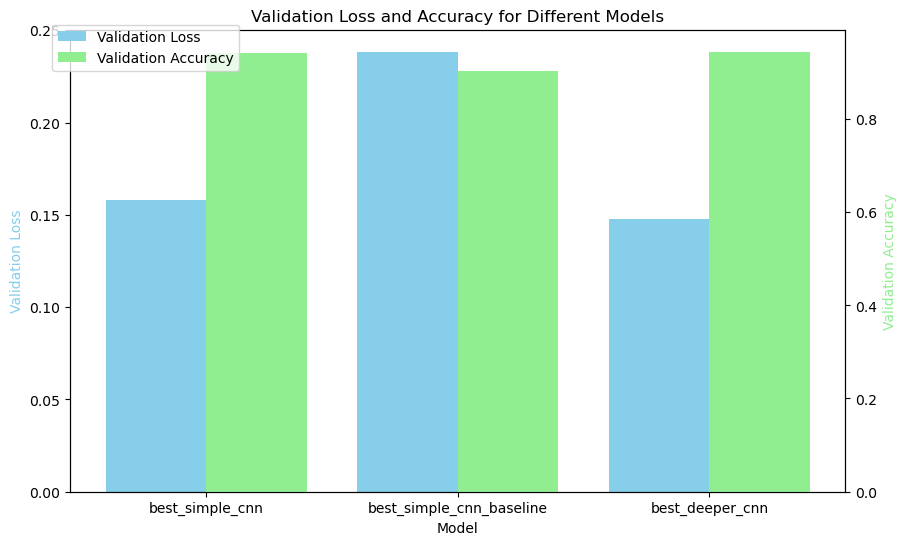

In [13]:
import torch
import os
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader
import numpy as np

###Define the device and criterion
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = torch.nn.BCELoss()

###Define the model classes
model_classes = {
    'best_simple_cnn': SimpleCNN,
    'best_simple_cnn_baseline': SimpleCNN_Baseline,
    'best_deeper_cnn': DeeperCNN
}

###Define the paths for saved models and their parameters
model_paths = {
    'best_simple_cnn': 'best_simple_cnn.pth',
    'best_simple_cnn_baseline': 'best_simple_cnn_baseline.pth',
    'best_deeper_cnn': 'best_deeper_cnn.pth'
}

params_paths = {
    'best_simple_cnn': 'best_simple_cnn_params.pth',
    'best_simple_cnn_baseline': 'best_simple_cnn_baseline_params.pth',
    'best_deeper_cnn': 'best_deeper_cnn_params.pth'
}

###Initialize lists to store results for plotting
model_names = []
validation_losses = []
validation_accuracies = []

###Evaluate each model
for model_name in model_classes:
    model = model_classes[model_name](dropout_rate=0.5, activation_fn=torch.nn.LeakyReLU).to(device)
    model.load_state_dict(torch.load(model_paths[model_name]))
    model.eval()

    ###Load the model parameters
    params = torch.load(params_paths[model_name])

    ###Plotting some results
    '''
    sample_images = val_labels.sample(6).reset_index(drop=True)
    plt.figure(figsize=(12, 8))
    for i, row in sample_images.iterrows():
        img_path = os.path.join(data_dir, 'train', row['id'] + '.tif')
        img = Image.open(img_path).resize((96, 96))
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f"Label: {int(row['label'])}")
        plt.axis('off')
    plt.show()
    '''

    ###Evaluate the model on validation data
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float()
            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            predicted = (outputs > 0.5).int()
            total += labels.size(0)
            correct += (predicted == labels.int()).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = correct / total

    model_names.append(model_name)
    validation_losses.append(val_loss)
    validation_accuracies.append(val_accuracy)

    print(f"Model: {model_name}")
    print(f"Hyperparameters: {params}")
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print('-' * 50)

###Plot the histogram
fig, ax1 = plt.subplots(figsize=(10, 6))

###Plot validation loss
ax1.bar(np.arange(len(model_names)) - 0.2, validation_losses, width=0.4, label='Validation Loss', color='skyblue')

###Plot validation accuracy
ax2 = ax1.twinx()
ax2.bar(np.arange(len(model_names)) + 0.2, validation_accuracies, width=0.4, label='Validation Accuracy', color='lightgreen')

###Add labels and title
ax1.set_xlabel('Model')
ax1.set_ylabel('Validation Loss', color='skyblue')
ax2.set_ylabel('Validation Accuracy', color='lightgreen')
ax1.set_xticks(np.arange(len(model_names)))
ax1.set_xticklabels(model_names)
ax1.set_title('Validation Loss and Accuracy for Different Models')

###Add legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

###Display the plot
plt.show()


### Analysis of Model Performance

Given the architectures of the models and their respective performances, below I provide a detailed explanation of the observed differences.

#### Analysis of `best_simple_cnn` and `best_simple_cnn_baseline`

The **best_simple_cnn** and **best_simple_cnn_baseline** models both utilize the LeakyReLU activation function, with a dropout rate of 0.3. However, the primary difference lies in their architecture.

The **best_simple_cnn** model, which includes three convolutional layers followed by a fully connected layer, outperformed the **best_simple_cnn_baseline** model. The deeper architecture of the **best_simple_cnn** model allows it to learn more complex features from the data. Specifically, the additional convolutional layer in the **best_simple_cnn** increases the model's capacity to capture intricate patterns and details in the input images. This enhanced feature extraction capability likely contributed to its superior performance, achieving a validation loss of 0.1581 and an accuracy of 0.9411, compared to the **best_simple_cnn_baseline** which had a validation loss of 0.2384 and an accuracy of 0.9022.

#### Analysis of `best_deeper_cnn`

The **best_deeper_cnn** model, with its significantly deeper architecture, includes five convolutional layers, which provide a much higher capacity for feature extraction. This model also employs a higher dropout rate of 0.5, which helps to mitigate overfitting by randomly dropping a higher proportion of neurons during training, ensuring that the model generalizes better to unseen data.

The deeper architecture of **best_deeper_cnn** allows it to achieve a high validation accuracy of 0.9446, indicating its ability to effectively learn and generalize complex patterns in the data. The lower validation loss of 0.1475 compared to the other models suggests that it not only achieves high accuracy but also maintains a strong generalization performance across the validation set. The combination of deeper layers and a higher dropout rate likely contributed to its strong performance, highlighting the importance of sufficient model complexity and regularization for achieving high accuracy.

### Summary

The performance differences among the models can largely be attributed to their architectural complexity and the choice of dropout rate. The **best_simple_cnn** model's additional convolutional layer provided a crucial boost in feature extraction capability over the **best_simple_cnn_baseline**, leading to better overall performance. The **best_deeper_cnn** model, with its significantly deeper architecture and higher dropout rate, demonstrated the highest accuracy, showcasing the benefits of increased model capacity and effective regularization. The use of the LeakyReLU activation function across all models helped in maintaining non-zero gradients, facilitating better learning dynamics. The Adam optimizer's ability to adaptively adjust learning rates further contributed to the overall performance of these models.


### Model Testing and Submission

After loading the best model, the next step involves preparing a custom dataset for testing. The `HistopathologicCancerTestDataset` class is defined to handle the test image data, inheriting from `torch.utils.data.Dataset`. This class includes methods to initialize the dataset with image IDs and directory paths, return the number of samples, and load specific images with optional transformations.

The test set images are resized to 96x96 pixels and converted to tensors to match the model's input requirements. A list of test image IDs is created by extracting the file names from the test directory. The test dataset and corresponding data loader are then created to handle batching and efficient data loading.

For prediction, the model is set to evaluation mode, and predictions are made on the test dataset without computing gradients, ensuring optimal performance. The predictions, along with the image IDs, are stored in a list and subsequently converted to a DataFrame. Finally, the results are saved to a CSV file, which I submited to Kaggle for scoring.

In [11]:
###Load the best model
model = DeeperCNN().to(device)
model.load_state_dict(torch.load('best_deeper_cnn.pth'))
model.eval()

###Custom Dataset for testing
class HistopathologicCancerTestDataset(Dataset):
    def __init__(self, ids, data_dir, transform=None):
        self.ids = ids
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.ids[idx] + '.tif')
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image, self.ids[idx]

###Define transformations for the test set images
transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.ToTensor()
])

###Directory of test images
test_dir = '/home/bbehe/Downloads/week3/test/'  

###List of test image IDs
test_ids = [fname.split('.')[0] for fname in os.listdir(test_dir) if fname.endswith('.tif')]

###Create the test dataset and dataloader
test_dataset = HistopathologicCancerTestDataset(test_ids, test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=8, pin_memory=True)

###Predict and save to CSV
submission = []
with torch.no_grad():
    for images, ids in test_loader:
        images = images.to(device)
        outputs = model(images).squeeze()
        probabilities = outputs.cpu().numpy()
        for img_id, prob in zip(ids, probabilities):
            submission.append((img_id, prob))

###Create the submission DataFrame
submission_df = pd.DataFrame(submission, columns=['id', 'label'])

###Save to CSV
submission_df.to_csv('/home/bbehe/Desktop/Coursera/Intro_to_deep_learning/best_deeper_cnn/submission.csv', index=False)

### Submission Results

The submission of the trained model's predictions was successfully completed, as evidenced by the displayed leaderboard screenshot. The submission file, `submission.csv`, achieved a score of 0.9558 on the public leaderboard, reflecting the model's performance based on the specified evaluation metric. Additionally, the private score of 0.8860 indicates the model's performance on a hidden test set, which helps in evaluating the model's generalization capabilities. This score demonstrates the model's effectiveness in accurately identifying metastatic cancer cells in the test images.

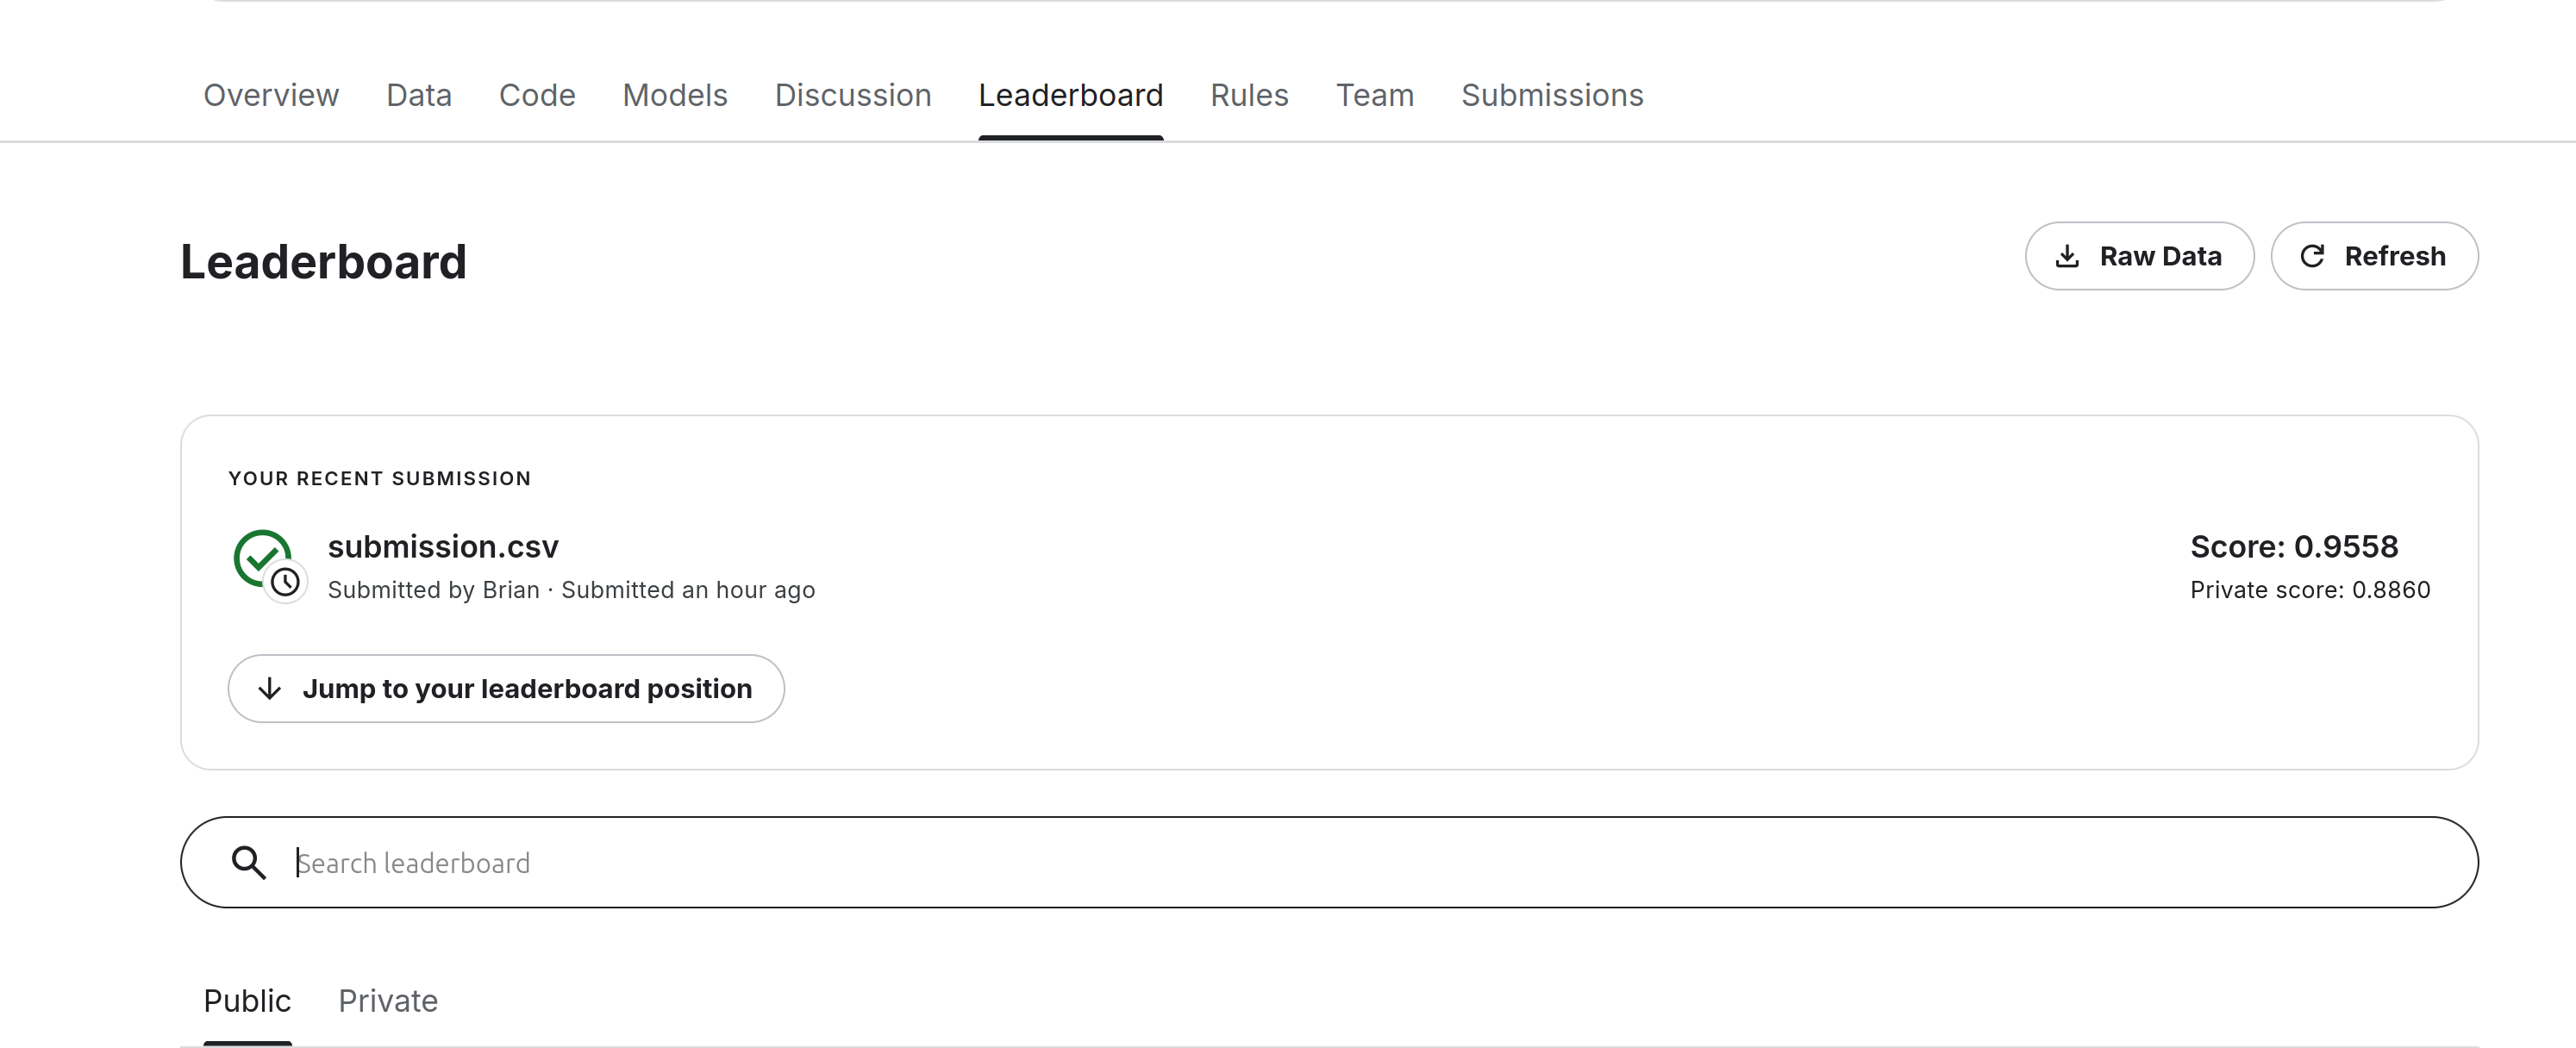

## Future Analysis Enhancements

### Data Augmentation Techniques

Exploring advanced augmentation methods could further enhance model generalization. Techniques such as color jittering, random cropping, and contrast adjustment might help the model learn more robust features. Additionally, using augmentation libraries like Albumentations, which provide a wide range of image transformations, could be beneficial.

### Transfer Learning

Leveraging pre-trained models on large datasets, such as ResNet, VGG, or EfficientNet, through transfer learning could significantly improve performance. These models have learned rich feature representations from diverse datasets and might provide a strong starting point. Fine-tuning these models on the histopathologic cancer dataset could yield better results compared to training from scratch.

### Hyperparameter Optimization

Using more sophisticated optimization techniques like Bayesian optimization, Random Search, or Genetic Algorithms could be employed to improve hyperparameter tuning. Libraries such as Optuna or Hyperopt might automate and enhance the efficiency of this process.

### Model Architectures

Experimenting with more complex architectures could enhance performance. Incorporating architectures like DenseNet, Inception, or custom-designed architectures with skip connections and attention mechanisms might capture more intricate patterns in the data. Additionally, exploring the use of deeper networks with regularization techniques like batch normalization and dropout could help in training more robust models.

### Ensembling Methods

Using ensemble techniques like bagging, boosting, or stacking might improve model performance by combining predictions from multiple models. Techniques such as Random Forests, Gradient Boosting Machines, or ensembling multiple CNN architectures could be explored to achieve better results.

### Cross-validation

Implementing k-fold cross-validation instead of a single train-validation split could provide a more reliable estimate of model performance. This approach might ensure that the model’s performance is evaluated across multiple subsets of the data, reducing variance and providing a more accurate assessment of its generalization ability.
